# `Level 1`

## `Task 1: Data Exploration and Preprocessing`
- Explore the dataset and identify the number of rows and columns.
- Check for missing values in each column and handle them accordingly.
- Perform data type conversion if necessary. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.

### `Import necessary libraries`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import plotly.express as px
import folium
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv('Dataset .csv')

In [3]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### `1. Explore the Dataset: Identify the Number of Rows and Columns`

In [4]:
# Display the number of rows and columns
rows, columns = df.shape
print(f'The dataset contains {rows} rows and {columns} columns.')

The dataset contains 9551 rows and 21 columns.


In [5]:
# Display duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]  
print(duplicate_rows)

Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes]
Index: []

[0 rows x 21 columns]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### `2. Check for missing values in each column`

In [7]:
missing_value = df.isnull().sum()
print('Missing values in each column:' )
print(missing_value)

Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [8]:
#Handling missing value in cuisines column- we have two options for that**
df= df.dropna() # we drop them

In [9]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### `3. Perform data type conversion if necessary.Analyze the distribution of the target variable("Aggregate rating") and identify any class imbalances.`

In [10]:
data_type = df.dtypes
print('data type of each column: ')
print(data_type)

data type of each column: 
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [11]:
# Analyze Distribution
rating_counts = df['Aggregate rating'].value_counts().sort_index()
print(rating_counts)


Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     495
3.5     480
3.6     458
3.7     427
3.8     399
3.9     332
4.0     266
4.1     274
4.2     221
4.3     174
4.4     143
4.5      95
4.6      78
4.7      41
4.8      25
4.9      61
Name: count, dtype: int64


In [12]:
mean_rating = df['Aggregate rating'].mean()
print(f"Mean: {mean_rating}")

Mean: 2.665237895619367


In [13]:
median_rating = df['Aggregate rating'].median()
print(f"Median: {median_rating}")

Median: 3.2


In [14]:
mode_rating = df['Aggregate rating'].mode()[0]
print(f"Mode: {mode_rating}")

Mode: 0.0


In [15]:
std_rating = df['Aggregate rating'].std()
print(f"Standard Deviation: {std_rating}")

print("\n" + "="*180 + "\n")

Standard Deviation: 1.5165875082081923




### **`Observations:Level 1-Task 1`**
- The Restaurant dataset consis various restaurant information from different citiessuach as restaurant names,city,address,locality,cuisines,rating,price etc.
- There are 9551 rows and 21 columns in dataset.
- Null values are only present in Cuisines,Only 9 null values are present i will remove them from data
- No null values now present
- Data type conversion is not reqired
- The distribution of target variable Aggregate rating is well balanced

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



## `Level 1 - Task 2 Descriptive Analysis`
### `1. Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.`

In [16]:
stats=df.describe()
print(stats)

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.542000e+03   9542.000000  9542.000000  9542.000000   
mean    9.043301e+06     18.179208    64.274997    25.848532   
std     8.791967e+06     56.451600    41.197602    11.010094   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019312e+05      1.000000    77.081565    28.478658   
50%     6.002726e+06      1.000000    77.192031    28.570444   
75%     1.835260e+07      1.000000    77.282043    28.642711   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9542.000000  9542.000000       9542.000000   9542.000000  
mean            1200.326137     1.804968          2.665238    156.772060  
std            16128.743876     0.905563          1.516588    430.203324  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [17]:
# Calculate the mean for each column
numeric_df = df.select_dtypes(include=['number'])
column_means = numeric_df.mean()

# Display the mean for each column
print("Mean for Each Column:")
print(column_means)

Mean for Each Column:
Restaurant ID           9.043301e+06
Country Code            1.817921e+01
Longitude               6.427500e+01
Latitude                2.584853e+01
Average Cost for two    1.200326e+03
Price range             1.804968e+00
Aggregate rating        2.665238e+00
Votes                   1.567721e+02
dtype: float64


In [18]:
# Calculate the median for each column
numeric_df = df.select_dtypes(include=['number'])
column_medians = numeric_df.median()

# Display the median for each column
print("Median for Each Column:")
print(column_medians)

Median for Each Column:
Restaurant ID           6.002726e+06
Country Code            1.000000e+00
Longitude               7.719203e+01
Latitude                2.857044e+01
Average Cost for two    4.000000e+02
Price range             2.000000e+00
Aggregate rating        3.200000e+00
Votes                   3.100000e+01
dtype: float64


In [19]:
# Calculate the standard deviation for each column
numeric_df = df.select_dtypes(include=['number'])
column_std = numeric_df.std()

# Display the standard deviation for each column
print("Standard Deviation for Each Column:")
print(column_std)

Standard Deviation for Each Column:
Restaurant ID           8.791967e+06
Country Code            5.645160e+01
Longitude               4.119760e+01
Latitude                1.101009e+01
Average Cost for two    1.612874e+04
Price range             9.055631e-01
Aggregate rating        1.516588e+00
Votes                   4.302033e+02
dtype: float64


<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



### 2. `Explore the distribution of categorical variables like "Country Code," "City," and "Cuisines."`

Exploring column: Country Code
Number of unique values: 15
Top 10 values in Country Code:
Country Code
1      8652
216     425
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64




C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\3020744719.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_values.values, y=top_10_values.index, palette="viridis")


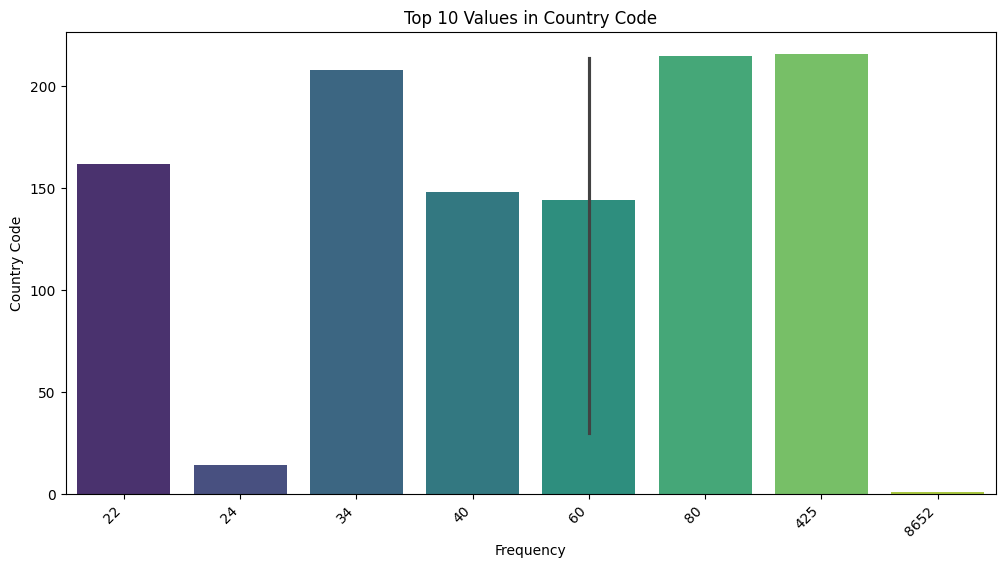

Exploring column: City
Number of unique values: 140
Top 10 values in City:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Ahmedabad         21
Lucknow           21
Guwahati          21
Amritsar          21
Name: count, dtype: int64




C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\3020744719.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_values.values, y=top_10_values.index, palette="viridis")


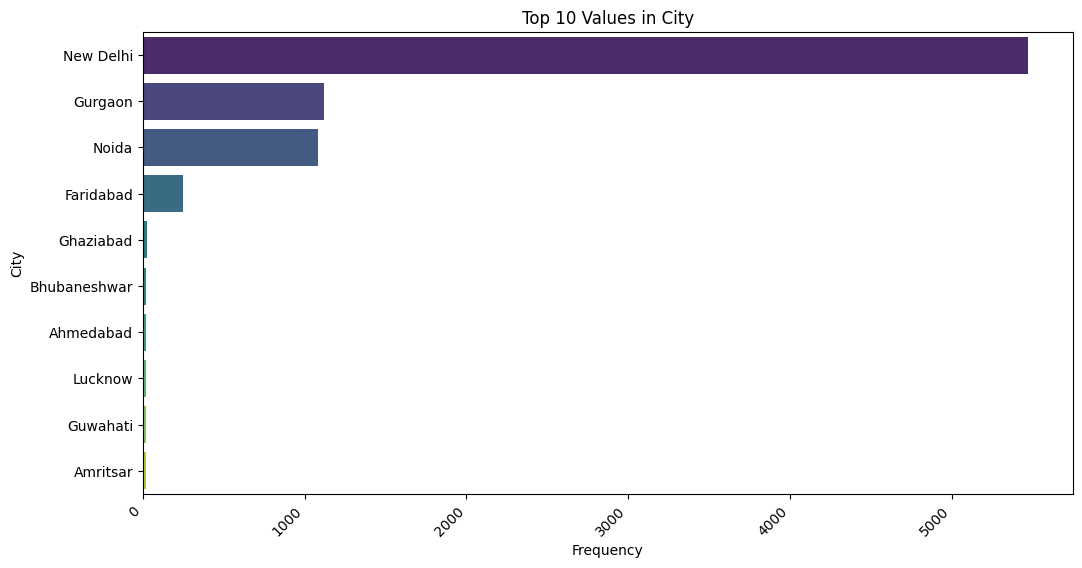

Exploring column: Cuisines
Number of unique values: 1825
Top 10 values in Cuisines:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64




C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\3020744719.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_values.values, y=top_10_values.index, palette="viridis")


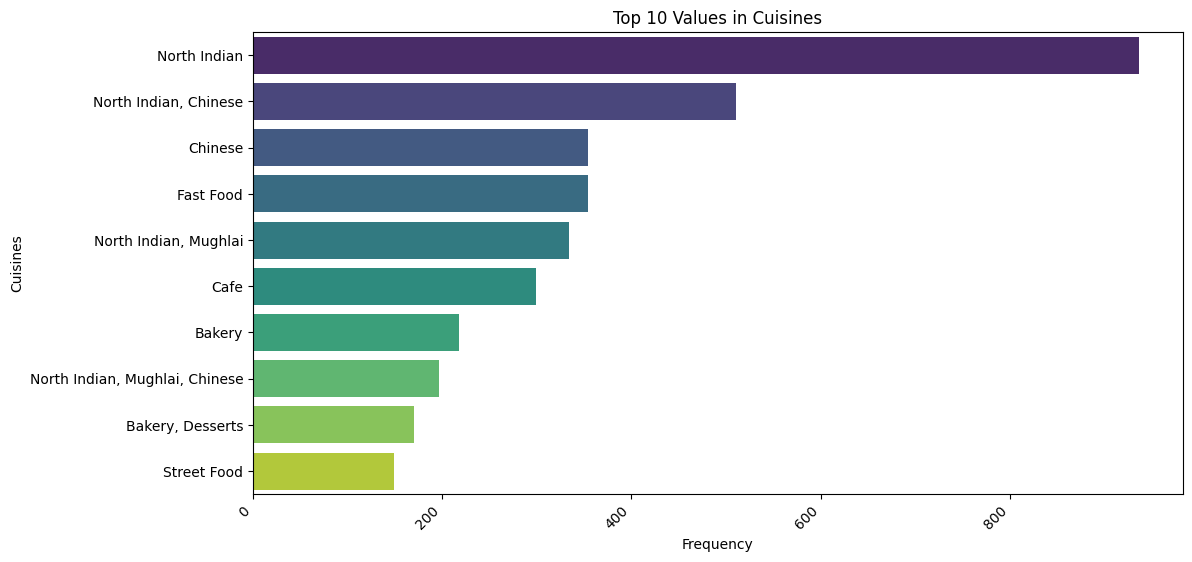

In [20]:
#distribution of categorical variables like "Country Code," "City," and "Cuisines."` 
categorical_columns = ['Country Code', 'City', 'Cuisines']

for col in categorical_columns:
    # Display basic information
    print(f"Exploring column: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Top 10 values in {col}:")
    top_10_values = df[col].value_counts().head(10)  # Show the top 10 most frequent values
    print(top_10_values)
    print("\n" + "="*50 + "\n")

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_10_values.values, y=top_10_values.index, palette="viridis")
    plt.title(f'Top 10 Values in {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.show()

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



### 3. `Identify the top cuisines and cities with the highest number of restaurants.`

Top Cuisines:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


Top Cities with the highest number of restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Ahmedabad         21
Lucknow           21
Guwahati          21
Amritsar          21
Name: count, dtype: int64




C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\1906763317.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")


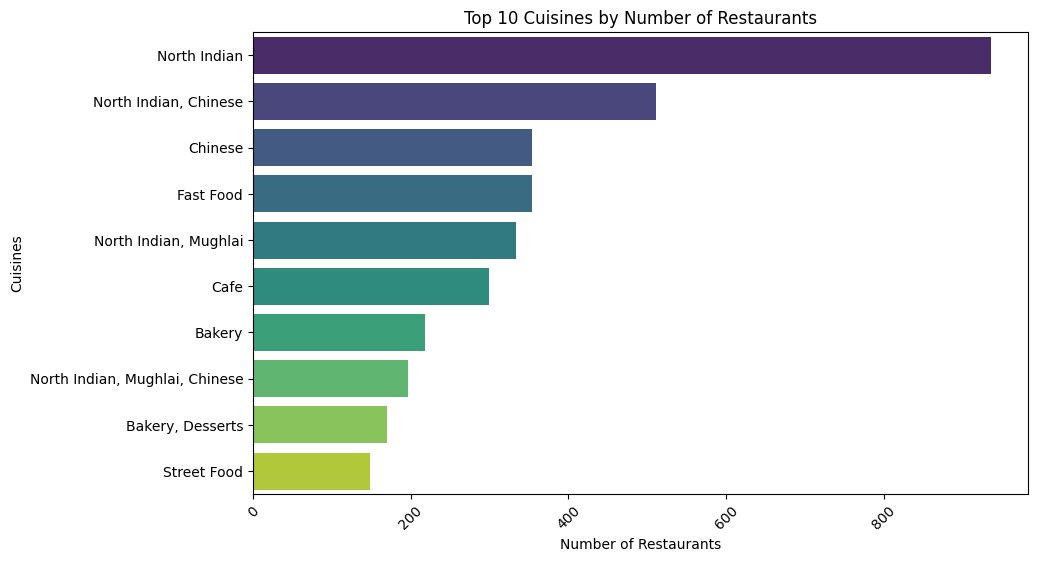

C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\1906763317.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="magma")


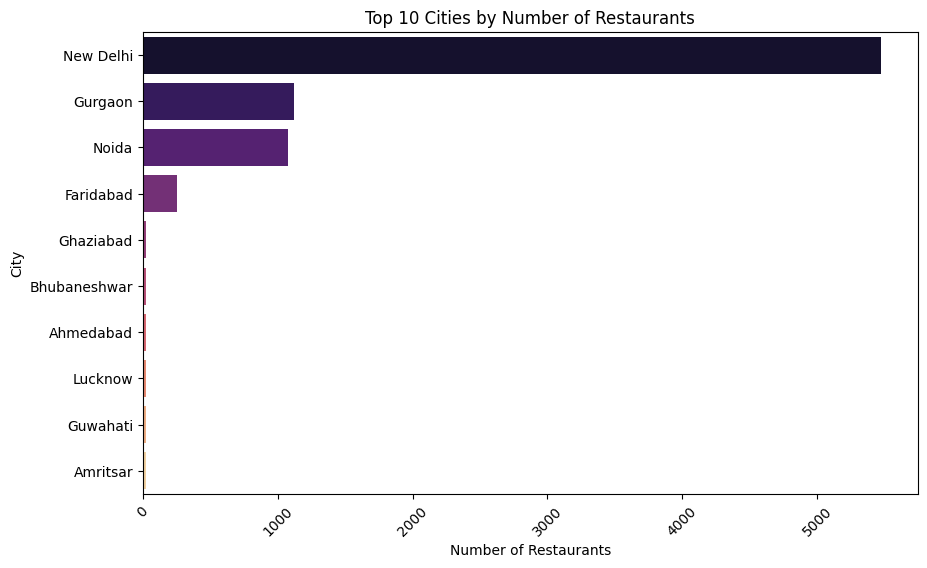

In [21]:
# Identify the top cuisines
top_cuisines = df['Cuisines'].value_counts().head(10)  # Adjust the number to get more or fewer top cuisines
print("Top Cuisines:")
print(top_cuisines)
print("\n" + "="*50 + "\n")

# Identify the top cities with the highest number of restaurants
top_cities = df['City'].value_counts().head(10)  # Adjust the number to get more or fewer top cities
print("Top Cities with the highest number of restaurants:")
print(top_cities)
print("\n" + "="*50 + "\n")

# Visualization for Top 10 Cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")
plt.title('Top 10 Cuisines by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisines')
plt.xticks(rotation=45)
plt.show()

# Visualization for Top 10 Cities
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="magma")
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.show()

**`observation of task-2(level-2)`**
- found mean of all numerical columns like as restaurant id,longitude,latitude and price range.
- Country code 1 and 216 have highest numbers of restaurant 8652 and 425.
- New delhi,Guargoan and Noida are having large number of resturants.
- North indian and chinease are top cuisines

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# `Level 1 - Task 3`: `Geospatial Analysis`

### 1. `Visualize the locations of restaurants on a map using latitude and longitude information.`

In [22]:
fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude', zoom = 0.25)
fig.update_layout(mapbox_style='carto-darkmatter', height = 500 , width = 800 , title = 'Location of the Resturants' , title_x = 0.5)
fig.show()

### 2.  `Analyze the distribution of restaurants across different cities or countries`


Top 10 Cities by Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Ahmedabad         21
Lucknow           21
Guwahati          21
Amritsar          21
Name: count, dtype: int64




C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\3496553042.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




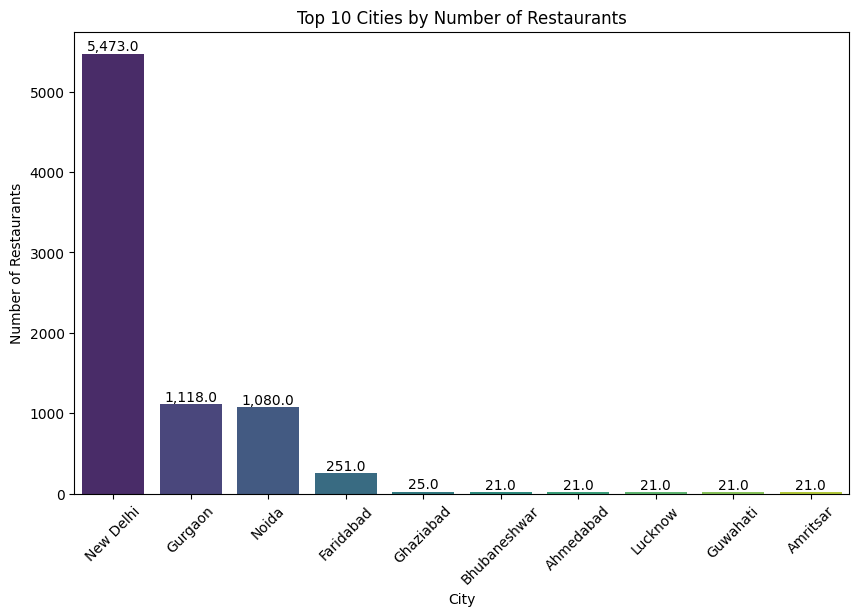

Top 10 Countries by Number of Restaurants:
Country Code
1      8652
216     425
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64




C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\3496553042.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




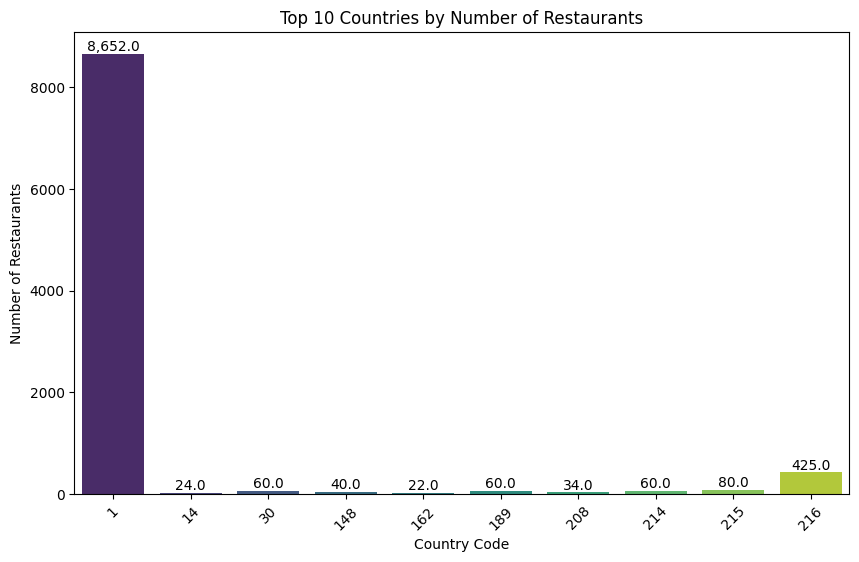

In [23]:
# Count the number of restaurants per city
city_distribution = df['City'].value_counts().head(10)

# Count the number of restaurants per country
country_distribution = df['Country Code'].value_counts().head(10)

# Display the top cities by restaurant count
print("Top 10 Cities by Number of Restaurants:")
print(city_distribution)
print("\n" + "="*50 + "\n")

# Plot the distribution of restaurants in the top 10 cities
plt.figure(figsize=(10, 6))
city_plot = sns.barplot(x=city_distribution.index, y=city_distribution.values, palette='viridis')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
# Adding labels on top of bars
for p in city_plot.patches:
    city_plot.annotate(format(p.get_height(), ','),
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords='offset points')
plt.show()





# Display the top countries by restaurant count
print("Top 10 Countries by Number of Restaurants:")
print(country_distribution)
print("\n" + "="*50 + "\n")

# Plot the distribution of restaurants in the top 10 countries
plt.figure(figsize=(10, 6))
country_plot = sns.barplot(x=country_distribution.index, y=country_distribution.values, palette='viridis')
plt.title('Top 10 Countries by Number of Restaurants')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
# Adding labels on top of bars
for p in country_plot.patches:
    country_plot.annotate(format(p.get_height(), ','),
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords='offset points')
plt.show()


### 3. `Determine if there is any correlation between the restaurant's location and its rating.`

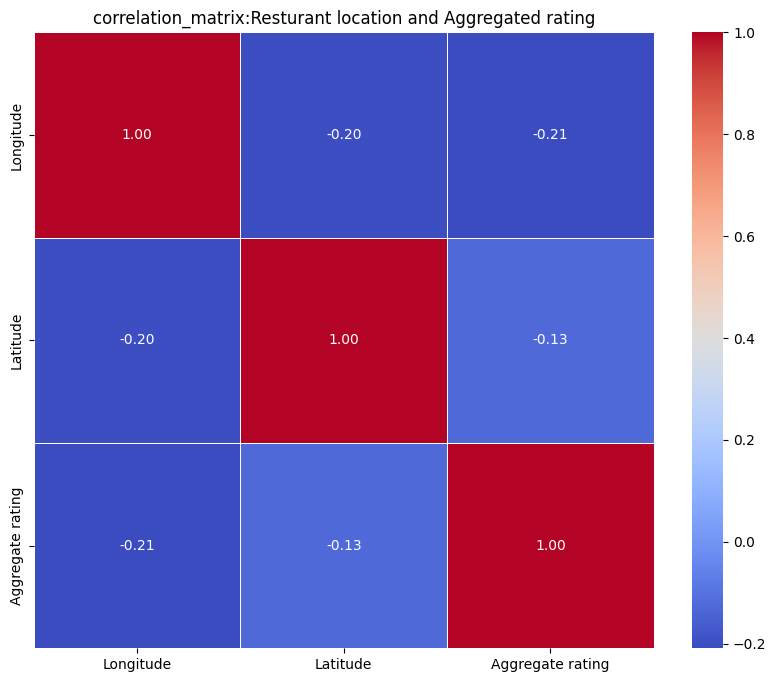

In [24]:
# Correlation between resturants location and its rating
location=df.groupby(['Longitude','Latitude'])['Aggregate rating'].mean().reset_index()

# create a correaltion matrix
co_matrix=location[['Longitude','Latitude','Aggregate rating']].corr()

# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(co_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('correlation_matrix:Resturant location and Aggregated rating')
plt.show()

print("\n" + "="*180 + "\n")

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



### **`observation of task-3(level-1`)**
- North America and Asia have the most number of restaurants
- New Delhi has the most number of restaurants.followed by Gurgoan,noida,Faridabad
- There is no correlation between Latitude and rating,langitude and rating are negatively correlated

## **`Conclusion of level-1 Task`**
**Data Overview:**
- The Restaurant dataset consis various restaurant information from different citiessuach as restaurant names,city,address,locality,cuisines,rating,price etc.
- There are 9551 rows and 21 columns in dataset.
- Null values are only present in Cuisines,Only 9 null values are present i will remove them from data
- No null values now present
- Data type conversion is not reqired
- The distribution of target variable Aggregate rating is well balanced

**Descriptive Insights:**
- Found Mean,median,mode values and other statistical measures for numerical columns like Restaurant ID,longitude,latitude,price range
- Country code 1 and 216 have highest number of restaurant 8652 and 425 respectively.
- New Delhi,Guargoan,Noida are in the top wit highest numbers of restaurant
- North indian and chinease cuisines are at the top with highest number of restaurants.

**Geospatial Analysis:**
- North America and Asia have the most number of restaurants
- New Delhi has the most number of restaurants.followed by Gurgoan,noida,Faridabad
- There is no correlation between Latitude and rating,langitude and rating are negatively correlated

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# `Level-2 `
## `Task 1 - Table booking and online delivery`

### 1. `Determine the percentage of resturants that offer table booking and online delivery.`

Percentage of table booking: 12.14%
table booking: Has Table booking
No     87.864179
Yes    12.135821
Name: proportion, dtype: float64%


Percentage of online delivery: 25.69%
online delivery: Has Online delivery
No     74.313561
Yes    25.686439
Name: proportion, dtype: float64%




C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\1145399704.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\1145399704.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




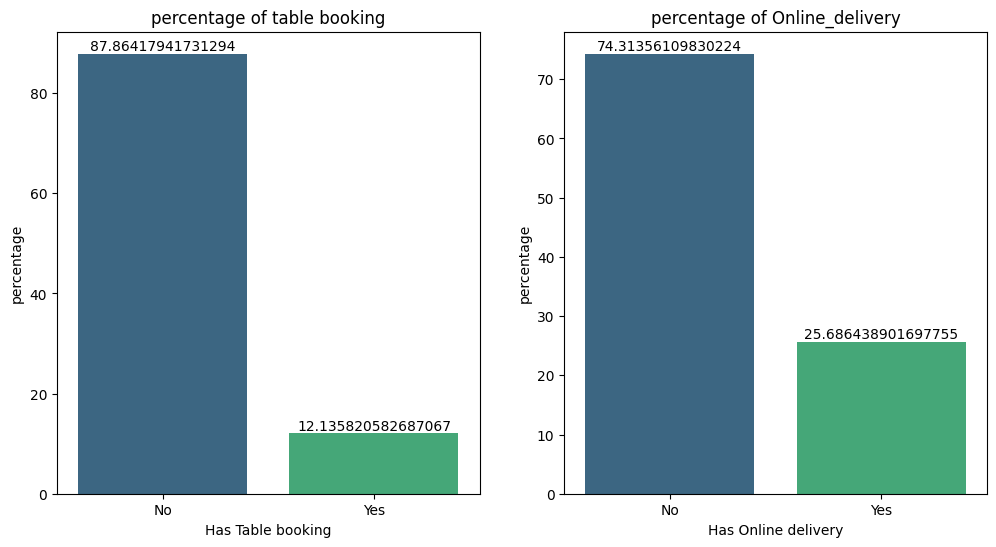

In [25]:
# calculate percentage of table booking
table_booking_perc=df['Has Table booking'].value_counts(normalize=True)*100
print(f"Percentage of table booking: {table_booking_perc.values[1]:.2f}%")
print(f"table booking: {table_booking_perc}%")

print("\n" + "="*50 + "\n")

# calculate % of Online delivery
Online_delivery_perc=df['Has Online delivery'].value_counts(normalize=True)*100
print(f"Percentage of online delivery: {Online_delivery_perc.values[1]:.2f}%")
print(f"online delivery: {Online_delivery_perc}%")
print("\n" + "="*50 + "\n")

# Plot for percentage
fig,axes = plt.subplots(1,2,figsize=(12,6))

#plot for table booking
booking=sns.barplot(x=table_booking_perc.index,y=table_booking_perc.values,ax=axes[0], palette="viridis")
axes[0].set_title('percentage of table booking')
axes[0].set_ylabel('percentage')
# Adding labels on top of bars
for p in booking.patches:
    booking.annotate(format(p.get_height(), ','),
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords='offset points')
    

#plot for online delivery
online=sns.barplot(x=Online_delivery_perc.index,y=Online_delivery_perc.values,ax=axes[1], palette="viridis")
axes[1].set_title('percentage of Online_delivery')
axes[1].set_ylabel('percentage')
# Adding labels on top of bars
for p in online.patches:
    online.annotate(format(p.get_height(), ','),
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords='offset points')

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



### 2. `Compare the average rating of resturants with table booking and those without.`

In [26]:
# Restaurants with and without table booking
#convert yes and no into binery
df['Has Table booking']=df['Has Table booking'].map({'Yes':1, 'No':0}) 
print(df['Has Table booking'].value_counts())

# calculate average rating with table booking
avg_rating_with_booking = df[df['Has Table booking']==1]['Aggregate rating'].mean()

# calculate average rating without table booking
avg_rating_without_booking = df[df['Has Table booking']==0]['Aggregate rating'].mean()

print(f"Average rating with table booking:{avg_rating_with_booking:.2f}")
print(f"Average rating without table booking:{avg_rating_without_booking:.2f}")

Has Table booking
0    8384
1    1158
Name: count, dtype: int64
Average rating with table booking:3.44
Average rating without table booking:2.56


<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



### 3. `Analyse the availability of online delivery among restaurants with different price ranges.`

In [27]:
# Availability of online delivery
# select price range
price_range= df['Average Cost for two'].apply(lambda x:'low' if x < 500 else 'medium' if 500 <=x<=1000 else 'high')
OD_by_price=df.groupby(price_range)['Has Online delivery'].value_counts(normalize=True).unstack()

#result
print('online delivery availability by price range:')
print(OD_by_price)


online delivery availability by price range:
Has Online delivery         No       Yes
Average Cost for two                    
high                  0.719149  0.280851
low                   0.858277  0.141723
medium                0.566209  0.433791


### **`Observation: Level 2-Task 1`**
- Percentage of resturants offering table booking 12.13% and online delivery 25.68%.
- The average rating with table booking is 3.44 and without table booking is 2.56
- Online delivery availability for medium price range food products is better compared to others low and high price range of products.

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## `Task – 2: Price Range Analysis`

### 1. `Determine the most common price range among all the restaurants.`

C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\3710471825.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




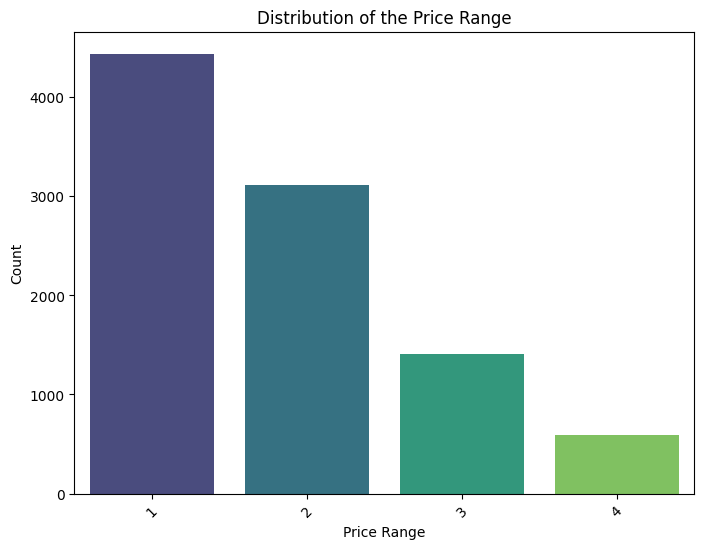

The most common price range is: 1


In [28]:
# Count of each price range
price_count = df['Price range'].value_counts()

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(x=price_count.index, y=price_count.values, palette='viridis')
plt.title('Distribution of the Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability
plt.show()

# the most common price range
common_price=price_count.idxmax()
print(f"The most common price range is: {common_price}")

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2. `Calculate the average rating for each price range.Identify the color that represents the highest average rating among different price ranges.`

C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\3649937323.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




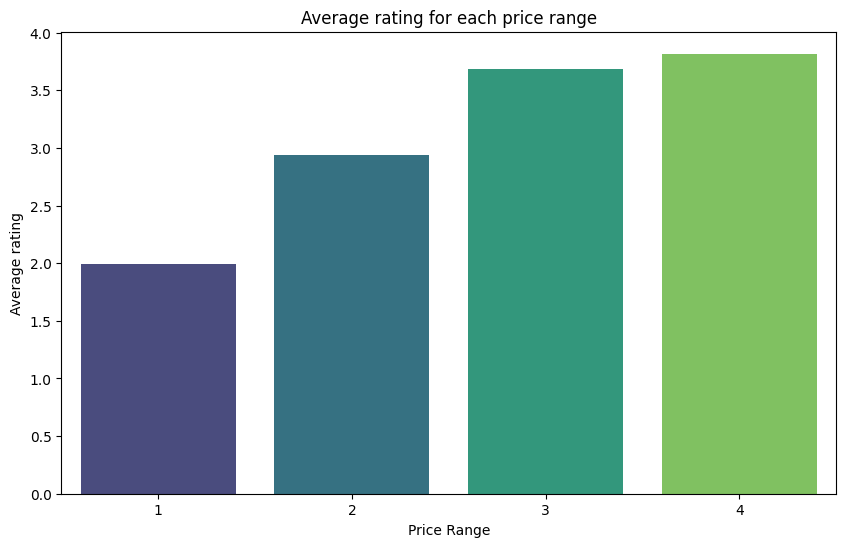

Average rating for each price range: Price range
1    1.997476
2    2.941054
3    3.682633
4    3.817918
Name: Aggregate rating, dtype: float64


In [29]:
#Calculate the average rating for each price range
average_rating_by_price=df.groupby('Price range')['Aggregate rating'].mean().sort_values()

# plot
plt.figure(figsize=(10,6))
sns.barplot(x=average_rating_by_price.index, y=average_rating_by_price.values, palette='viridis')
plt.title('Average rating for each price range')
plt.xlabel('Price Range')
plt.ylabel('Average rating')
plt.show()

print('Average rating for each price range:',average_rating_by_price)

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### `3. Identify the color that represents the highest average rating among different price ranges.`

Price range and color with the highest average rating:
Price range: 1
Rating color: Dark Green
Highest average rating: 4.6626923432147835


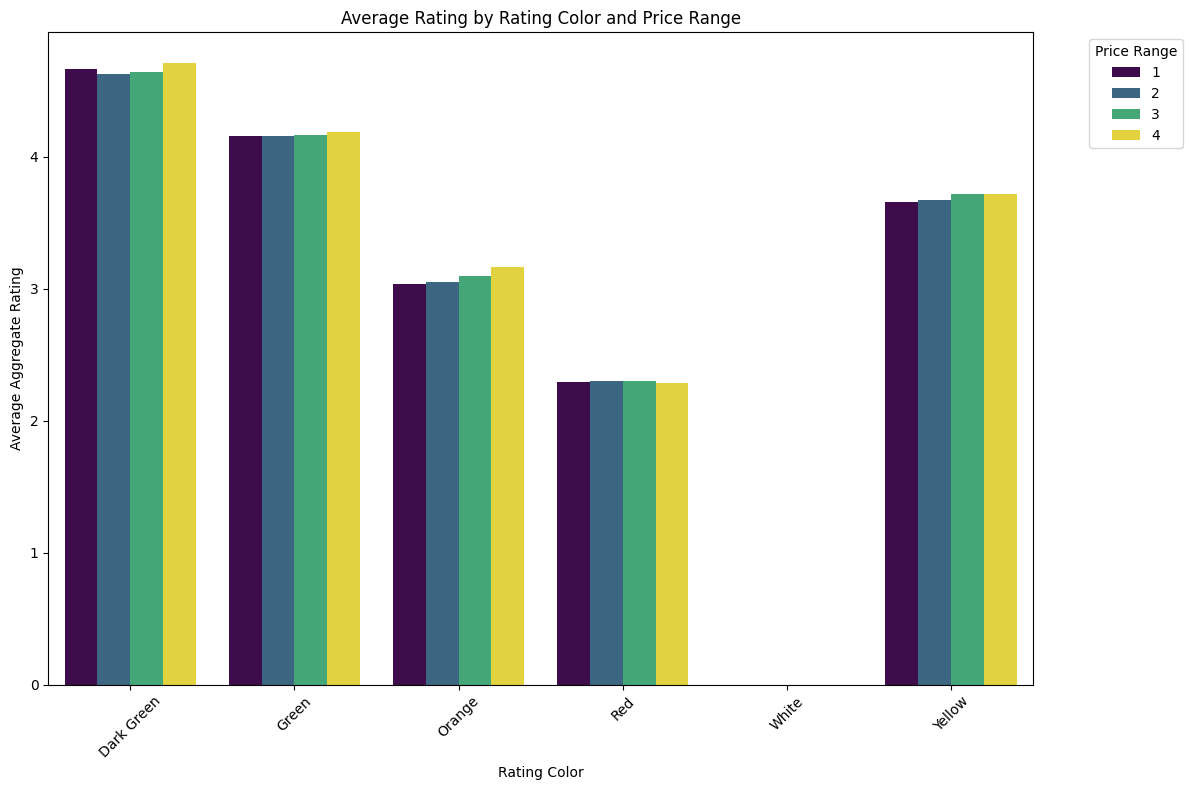

In [30]:
average_rating = df.groupby(['Price range', 'Rating color'])['Aggregate rating'].mean().reset_index()

# highest average rating and its associated Price range and Rating color
highest_avg_rating_index = average_rating.groupby('Rating color')['Aggregate rating'].mean().idxmax()
highest_avg_rating_value = average_rating.groupby('Rating color')['Aggregate rating'].mean().max()
highest_rating_row = average_rating[average_rating['Rating color'] == highest_avg_rating_index]

highest_rating_price_range = highest_rating_row['Price range'].values[0]

print('Price range and color with the highest average rating:')
print(f'Price range: {highest_rating_price_range}')
print(f'Rating color: {highest_avg_rating_index}')
print(f'Highest average rating: {highest_avg_rating_value}')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=average_rating, x='Rating color', y='Aggregate rating', hue='Price range', palette='viridis')
plt.title('Average Rating by Rating Color and Price Range')
plt.xlabel('Rating Color')
plt.ylabel('Average Aggregate Rating')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n" + "="*180 + "\n")

### **`Observation Level 2: Task 2`**
- The most common price range among all restaurants is red.
- Rating color: Dark Green gets the highest average rating,which is 4.66 followed by green,orange and red.

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## `Task 3: Feature Engineering`
### 1. `Extract additional features from the existing columns, such as the length of the restaurant name or address.`


In [31]:
#Extract additional features from the existing columns, such as the length of the restaurant name or address
df['Restaurant_Name_Len']=df['Restaurant Name'].apply(len)
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant_Name_Len
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,1,No,No,No,3,4.8,Dark Green,Excellent,314,16
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,1,No,No,No,3,4.5,Dark Green,Excellent,591,16


In [32]:
df['Address Length'] = df['Address'].apply(len)
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant_Name_Len,Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67


<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2. `Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables`

In [33]:

# Columns to be label encoded
columns_to_encode = [ 'Has Online delivery', 'Is delivering now', 'Switch to order menu']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the specified columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the transformed DataFrame
print(df.head(3))

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandalu

In [34]:
yes_no_counts = {}
for column in columns_to_encode:
    yes_count = df[column].sum()  # Count of 'Yes' (since 'Yes' is encoded as 1)
    no_count = len(df) - yes_count  # Count of 'No' (total rows minus count of 'Yes')
    yes_no_counts[column] = {'Yes': yes_count, 'No': no_count}

# Display the counts
for column, counts in yes_no_counts.items():
    print(f"{column}: Yes = {counts['Yes']}, No = {counts['No']}")

Has Online delivery: Yes = 2451, No = 7091
Is delivering now: Yes = 34, No = 9508
Switch to order menu: Yes = 0, No = 9542


<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Conclusion:`**

**Table Booking and Online Delivery**
- Percentage of restaurants offering table booking 12.14% and online delivery is 25.69
- The average rating with table booking is 3.44 and without table booking is 2.56
- Online delivery availability for medium price range food products is better compared to others low and high price range of products.

**Price Range Analysis**
- The most common price range among all restaurants is 1
- Price ranges 4 gets the highest average rating,which is 3.818 followed by price range 3,2,1

**Feature Engineering**
- Two new columns were added,Restaurants Name and address length from length of restaurant name or address
- Two binary columns were added by encoding categorical columns Has Table booking and Has Online delivery

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **`Level 3`**
## `Task 1 - Predictive Modeling`


### **`1. Build a regression model to predict the aggregate rating of a restaurant based on available features.`**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [36]:
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking', 'Has Online delivery']
target = 'Aggregate rating'

X = df[features]
y = df[target]

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`2. Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.`**

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [38]:
# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies as well
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`3. Experiment with different algorithms (e.g.,linear regression, decision trees, random forest) and compare their performance.`**

In [39]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_imputed, y_train)
linear_reg_predictions = linear_reg.predict(X_test_imputed)

# Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train_imputed, y_train)
decision_tree_predictions = decision_tree_reg.predict(X_test_imputed)

# Random Forest Regression
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train_imputed, y_train)
random_forest_predictions = random_forest_reg.predict(X_test_imputed)

# Evaluate the models
def evaluate_model(predictions, y_test, model_name):
    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, predictions)
    print(f'{model_name} - RMSE: {rmse:.3f}, R2 Score: {r2:.3f}')

# Evaluate Linear Regression
evaluate_model(linear_reg_predictions, y_test, 'Linear Regression')

print("\n" + "="*50 + "\n")

# Evaluate Decision Tree Regression
evaluate_model(decision_tree_predictions, y_test, 'Decision Tree Regression')
print("\n" + "="*50 + "\n")

# Evaluate Random Forest Regression
evaluate_model(random_forest_predictions, y_test, 'Random Forest Regression')

Linear Regression - RMSE: 1.276, R2 Score: 0.289


Decision Tree Regression - RMSE: 0.447, R2 Score: 0.913


Random Forest Regression - RMSE: 0.362, R2 Score: 0.943


### ***`Observation:Level 3:Task 1`***
- The Random Forest Regression model appears to be the most suitable for predicting aggregate ratings in this scenario.
- Decision Tree Regression also performs well but is slightly less accurate than the Random Forest model.
- Linear Regression, while providing insights, may not capture the complex relationships present in the data as effectively as tree-based models.

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## `Task 2 - Customer Preference Analysis`

### `1. Analyze the relationship between the type of cuisine and the restaurant's rating.`

C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\3978054541.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




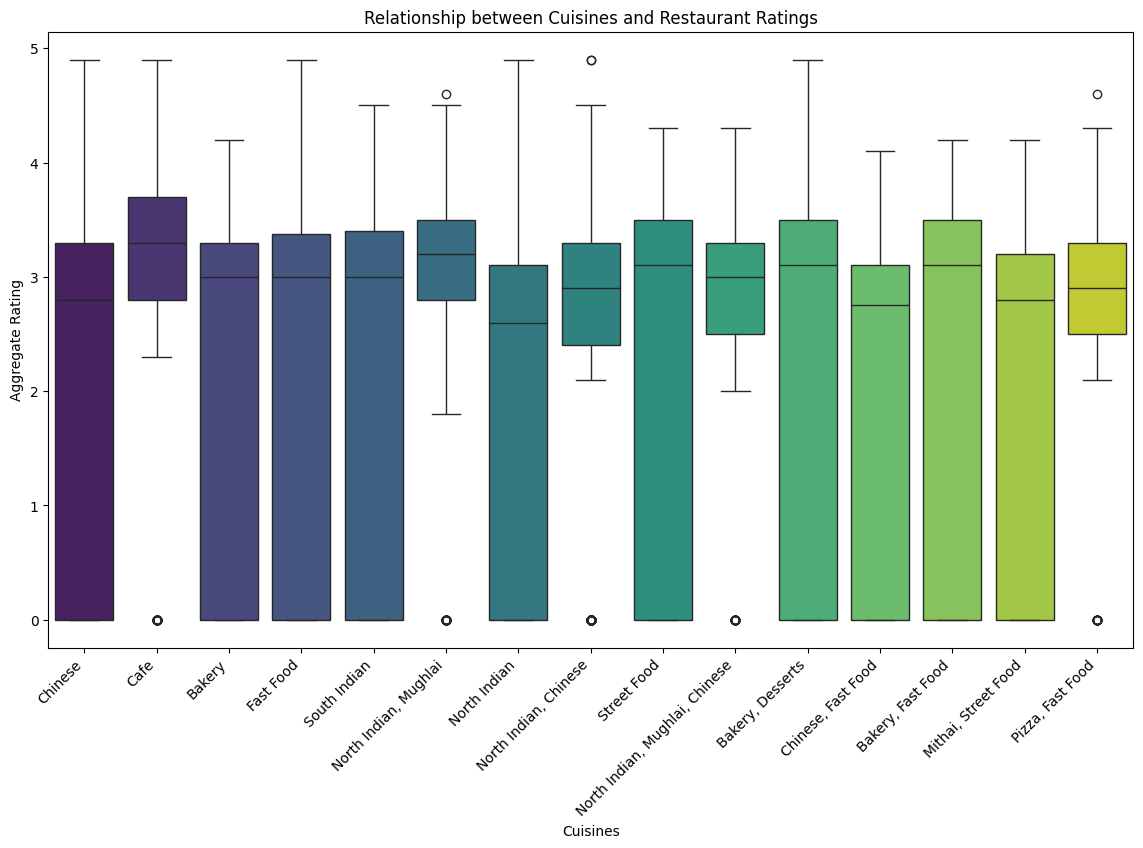

In [40]:
#There are many cuisines names present in data,so i selected only top 15
top_n = 15

# Get the top cuisines based on count
top_cuisines = df['Cuisines'].value_counts().nlargest(top_n).index

# Filter the dataset for the top cuisines
df_top_cuisines = df[df['Cuisines'].isin(top_cuisines)]

# Create a boxplot to analyze the relationship between cuisines and ratings
plt.figure(figsize=(14, 8))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=df_top_cuisines, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Relationship between Cuisines and Restaurant Ratings')
plt.xlabel('Cuisines')
plt.ylabel('Aggregate Rating')
plt.show()

print("\n" + "="*180 + "\n")

### 2. `Identify the most popular cuisines among customers based on the number of votes.`

C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\1057643829.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Top cuisines by the number of votes:


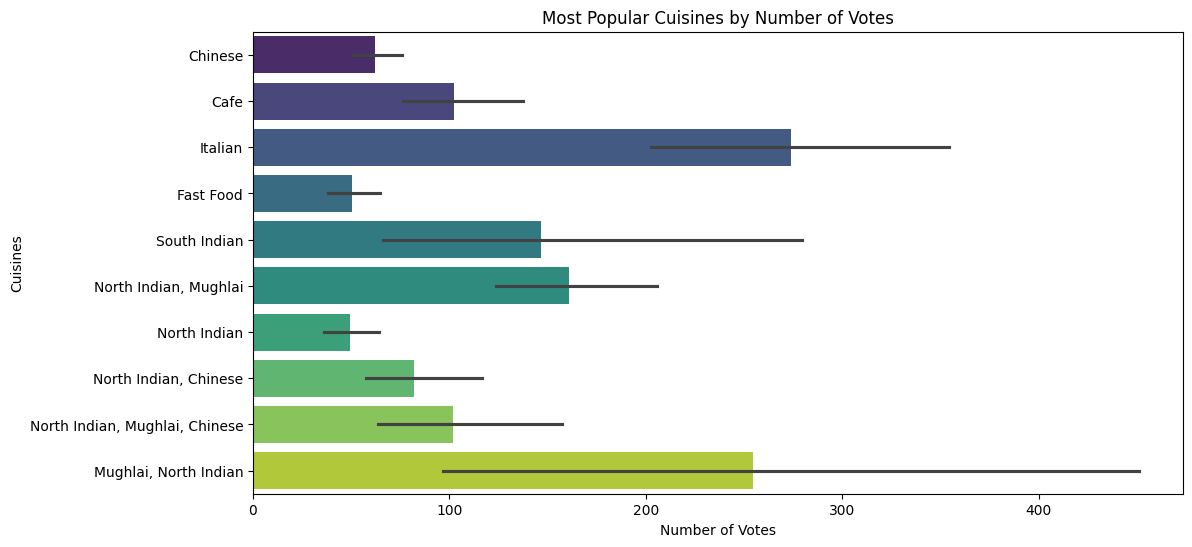

Top cuisines by the number of votes
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64




In [41]:
# Get the most popular cuisines by number of votes
popular_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(10).index

# Filter the dataset for the most popular cuisines
df_popular_cuisines = df[df['Cuisines'].isin(popular_cuisines)]

# Create a bar plot to visualize the most popular cuisines by number of votes
plt.figure(figsize=(12, 6))
sns.barplot(x='Votes', y='Cuisines', data=df_popular_cuisines, palette='viridis')
plt.title('Most Popular Cuisines by Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Cuisines')

# Print a sentence indicating the purpose of the plot
print("Top cuisines by the number of votes:")
plt.show()

top_cuisines=df.groupby('Cuisines')['Votes'].sum ().nlargest(10)
print('Top cuisines by the number of votes')
print(top_cuisines)

print("\n" + "="*180 + "\n")

### `3. Determine if there are any specific cuisines that tend to receive higher ratings.`

Cuisines with higher ratings:


C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\2249790032.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




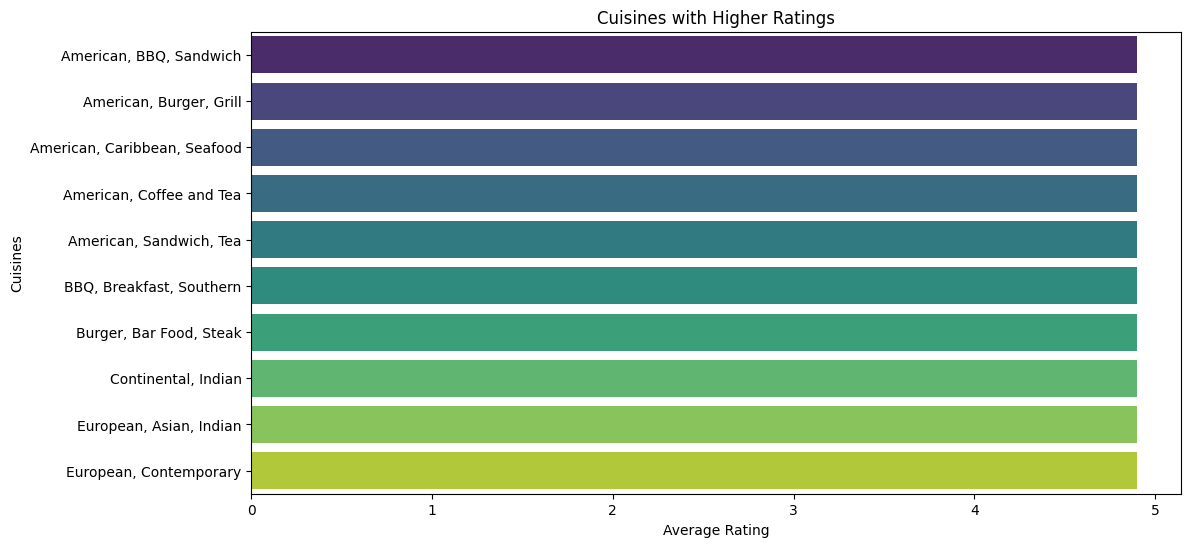

In [42]:
# Get the average rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().nlargest(10)

# Create a bar plot to visualize cuisines with higher ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='viridis')
plt.title('Cuisines with Higher Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Cuisines')

# Print a sentence indicating the purpose of the plot
print("Cuisines with higher ratings:")
plt.show()

print("\n" + "="*180 + "\n")

### **`Observation:Level 3:Task 2`**
- In cuisines like cafes,mughlai,north indian,fast food restaurants may performs exceptinally well or poorly in terms of ratings
- North indian and chinese cuisines have more varied ratings
- Cafes and fast food cuisines have consistent ratings
- Based on numbers of votes north indian,mughlai,chinese cuisines are most popular cuisines

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## `Task 3: Data Visualization`

### `1. Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.)`

C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\1421718044.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




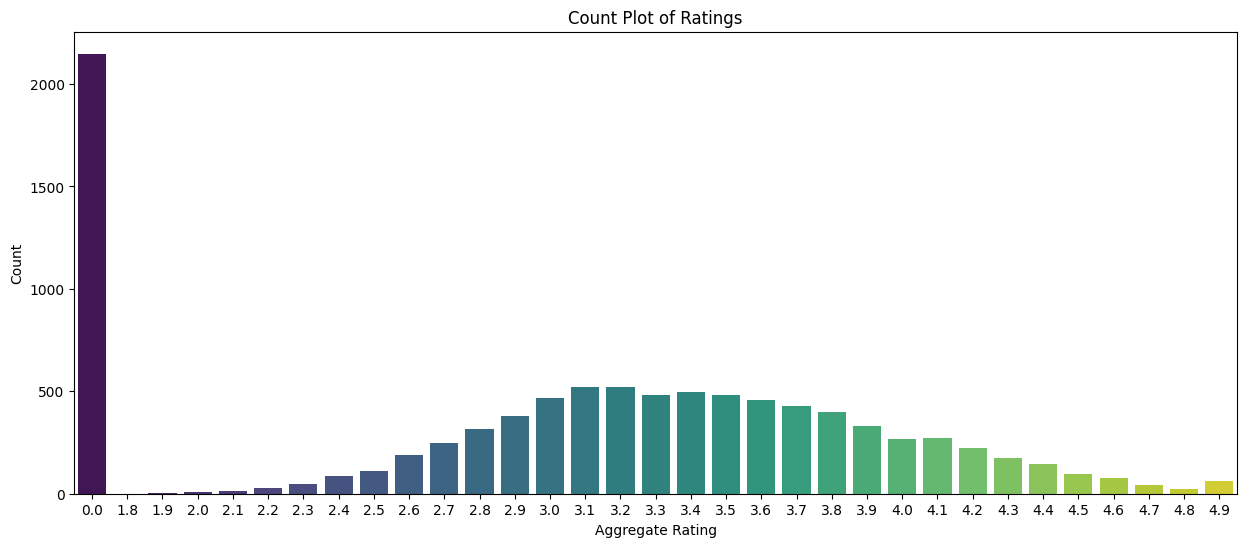

In [43]:
# Create a count plot of the ratings
plt.figure(figsize=(15, 6))
sns.countplot(x='Aggregate rating', data=df, palette='viridis')
plt.title('Count Plot of Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')

# Show the plot
plt.show()

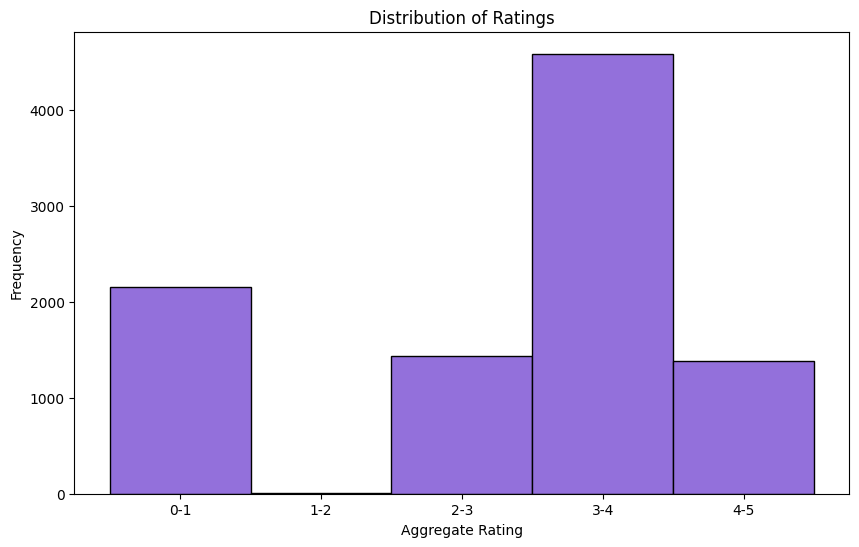

In [44]:
# Define the bins and labels
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']

# Create a histogram of the ratings with custom bins and labels
plt.figure(figsize=(10, 6))
plt.hist(df['Aggregate rating'], bins=bins, color='#9370db', edgecolor='black')

# Add labels and title
plt.title('Distribution of Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')

# Add custom x-axis labels
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], labels)  # Adjusted tick positions

# Show the plot
plt.show()

print("\n" + "="*180 + "\n")


### `2. Compare the average ratings of different cuisines or cities using appropriate visualizations.`

#### `Comparing avarage rating and different cuisines`

C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\2029110417.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




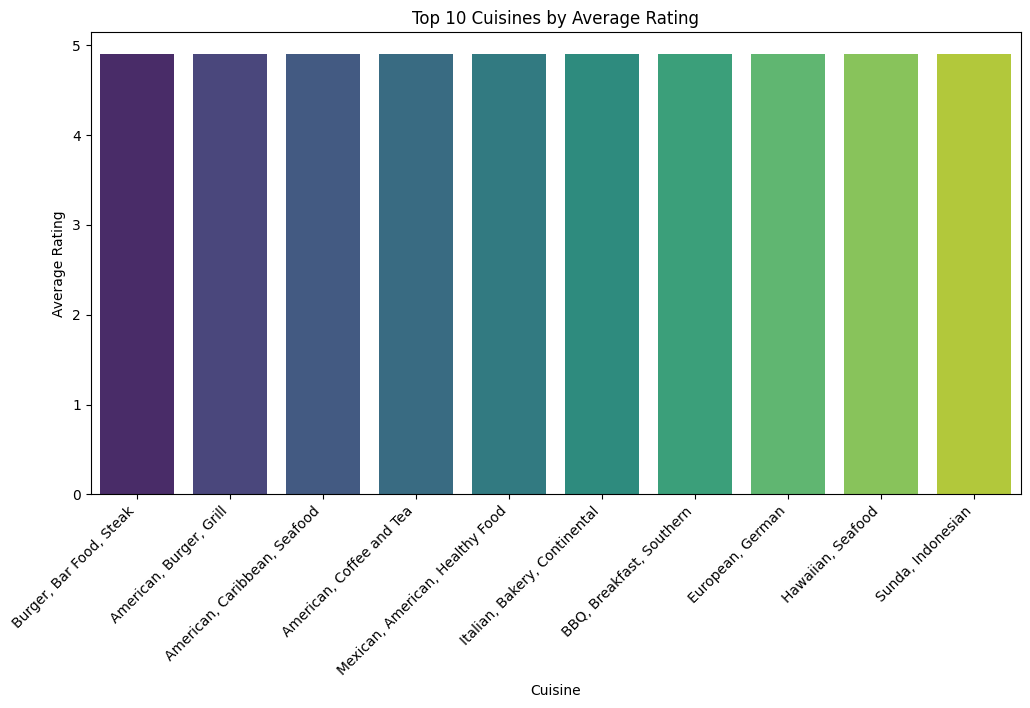

In [45]:
# Group the data by cuisines and calculate the average rating for each cuisine
average_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Select the top N cuisines for better visualization
top_n_cuisines = 10
top_cuisines = average_ratings.head(top_n_cuisines)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='viridis')  # You can choose a different color palette

# Customize the plot
plt.title(f'Top {top_n_cuisines} Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

#### `Comparing avarage rating and different cities`

C:\Users\sonip\AppData\Local\Temp\ipykernel_16148\736777799.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




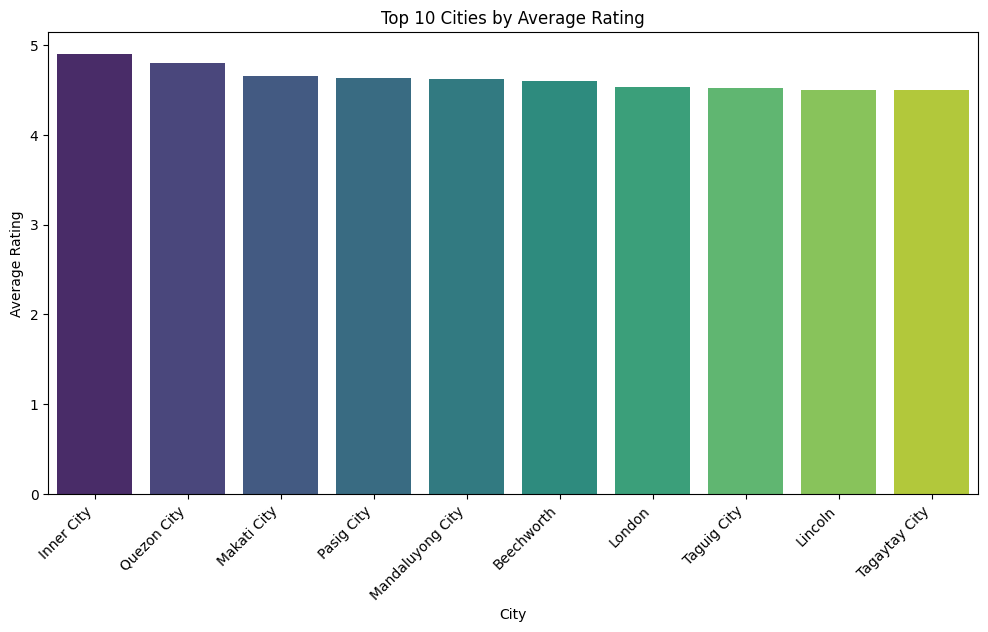

In [46]:
# Group the data by cities and calculate the average rating for each city
average_ratings_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Select the top N cities for better visualization
top_n_cities = 10
top_cities = average_ratings_by_city.head(top_n_cities)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')  # You can choose a different color palette

# Customize the plot
plt.title(f'Top {top_n_cities} Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

print("\n" + "="*180 + "\n")

### `3. Visualize the relationship between various features and the target variable to gain insights`

<Figure size 1200x800 with 0 Axes>

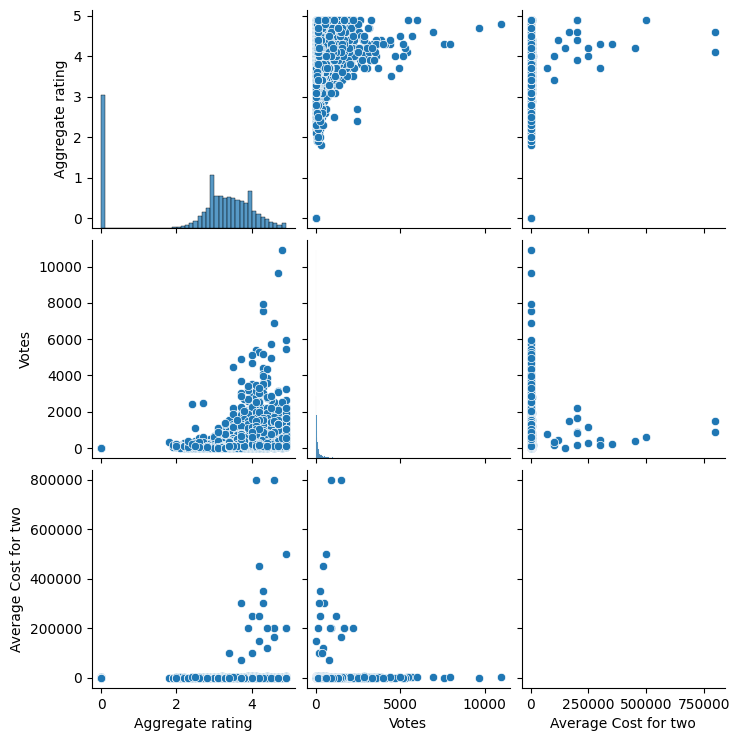

In [47]:
# Select relevant features for pairplot
selected_features = ['Aggregate rating', 'Votes', 'Average Cost for two']

# Create a pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(df[selected_features])
plt.show()

print("\n" + "="*180 + "\n")

### `Observations Level 3:Task 3`
- The distributions of restaurants ratings is negatively skewed.
- Based on the highest average ratings italian,hawaiian,seafood,tea,sandwich,cpontinental,indian cuisines are most popular
- Based on highest average ratings inner city,quezon city,makati city etc are most popular cities
- Votes abd restaurants ratings are positively skewed.

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **`Conclusion of level-1 Task`**

`Predictive Modeling`
- The Random Forest Regression model appears to be the most suitable for predicting aggregate ratings in this scenario.

`Customer Preference Analysis`
- Certain cuisines like cafes,mughlai,north indian,fast food restaurants may performs exceptinally well or poorly in terms of ratings
- North indian and chinese cuisines have more varied ratings Cafes and fast food cuisines have consistent ratings
- North indian,mughlai,chinese cuisines are most popular cuisines

`Data Visualization`
- The distributions of restaurants ratings is negatively skewed.
- italian,hawaiian,seafood,tea,sandwich,cpontinental,indian cuisines are most popular
- inner city,quezon city,makati city etc are most popular cities
- We observed Votes abd restaurants ratings are positively skewed.

<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<b>----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------